TRAINING MNIST DATASET 



In [1]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


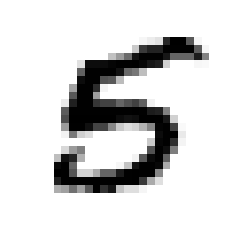

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[20000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
plt.axis("off")
plt.show()

Label of the above image is :

In [3]:
y[20000]

'5'

In [4]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

Shuffling the dataset so as to improve the models accuracy and prevent biasness

In [5]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


SGD(Stochastic Gradient Descent)

In [6]:
import numpy as np
# Shuffle order #
shuffle_index  = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]




from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)


sgd_clf.predict([some_digit])


array(['5'], dtype='<U1')

In [7]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-21152.73163222, -49554.59479567, -19496.09882019,
        -11340.39633291, -14707.10913332,    608.40039638,
        -14455.66875596, -59791.30207552,  -4408.56427413,
        -13839.00334669]])

As you can see the 5th element in the above array has a positive or Maximum score hence the output 
prediction was a 5

OvO-One v/s One

In [9]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42)) 
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


array(['5'], dtype=object)

In [10]:
len(ovo_clf.estimators_)

45

RANDOM FOREST CLASSIFIER

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array(['5'], dtype=object)

Probability for [some_digit] belonging to each classes

In [13]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.  , 0.01, 0.97, 0.02, 0.  , 0.  , 0.  ]])

0.97 for belonging to digit 5,impressive!!

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3) 
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

Multioutput Classification

In [20]:
import numpy as np


# Generate random noise for training set
noise_train = np.random.randint(0, 100, (len(X_train), 784))

# Generate random noise for test set
noise_test = np.random.randint(0, 100, (len(X_test), 784))


In [22]:
X_train_mod = X_train + noise_train
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test


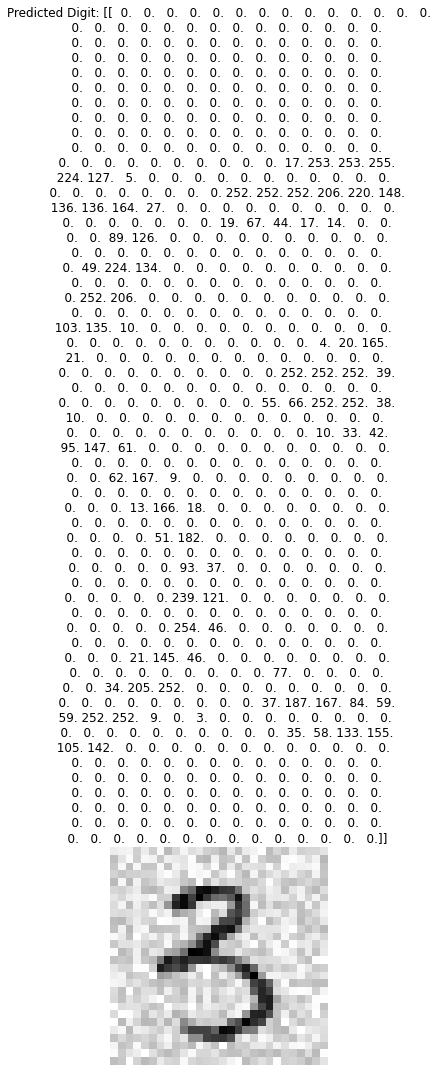

In [28]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Create and fit the KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

# Predict a clean digit
clean_digit = knn_clf.predict([X_test_mod[5000]])

# Assuming clean_digit is a single digit label, not an array
plt.imshow(X_test_mod[5000].reshape(28, 28), cmap="binary")
plt.title(f"Predicted Digit: {clean_digit}")
plt.axis("off")
plt.show()

